In [28]:
from typing import List

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import summarize_features, print_df
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [86]:
def load_cv_analytics_util_see_stats(filesuffix):
    cv_analytics_util = CvAnalyticsUtil.load_cv_analytics_utils(filesuffix)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    return cv_analytics_util

def plot_hist_side_by_side_for_class(df, label, xaxis, normalize = True):
    # Compute histogram
    plt.style.use('seaborn-deep')
    fig, ax = plt.subplots(1, 1, figsize=(20, 8))
    num_bins = 20
    positive_df = df[df[label] == 1]
    bin_edges = np.linspace(0, 1, num_bins + 1)
    hist_positive, bin_edges = np.histogram(positive_df[xaxis], bins=bin_edges)

    negative_df = df[df[label] == 0]
    hist_negative, bin_edges = np.histogram(negative_df[xaxis], bins=bin_edges)
    if normalize:
        hist_positive = hist_positive / sum(hist_positive)
        hist_negative = hist_negative / sum(hist_negative)
    ax.hist([bin_edges[:-1], bin_edges[:-1]], bin_edges, weights=[hist_positive, hist_negative], label=['positive', 'negative'])
    ax.legend(title=label)
    ax.set_ylabel('Class percentage')
    ax.set_xlabel(xaxis)
    plt.show()

def get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years'):
    id_and_confidence = []
    for analytics_util in cv_analytics_util.analytics_utils:
        X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
        X_test_mismatch = X_test.copy()
        y_pred, y_prob = analytics_util.get_predictions() 
        X_test_mismatch[f'{label}_pred'] = y_pred
        X_test_mismatch[f'{label}_prob'] = y_prob
        id_and_confidence.append(X_test_mismatch)
    full_dataset = pd.concat(id_and_confidence)
    return full_dataset



Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999786 | 0.000138564 | 0.999551  | 1        |
| recall__class_0    | 0.996863 | 0.000684008 | 0.995095  | 0.997695 |
| f1-score__class_0  | 0.998322 | 0.000348855 | 0.997363  | 0.998758 |
| precision__class_1 | 0.151857 | 0.0390611   | 0.0833333 | 0.212121 |
| recall__class_1    | 0.723148 | 0.17728     | 0.444444  | 1        |
| f1-score__class_1  | 0.249716 | 0.0606469   | 0.144928  | 0.340426 |
| accuracy           | 0.996652 | 0.000694785 | 0.994742  | 0.99752  |
| auc                | 0.992637 | 0.00743005  | 0.970862  | 0.999844 |
+--------------------+----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


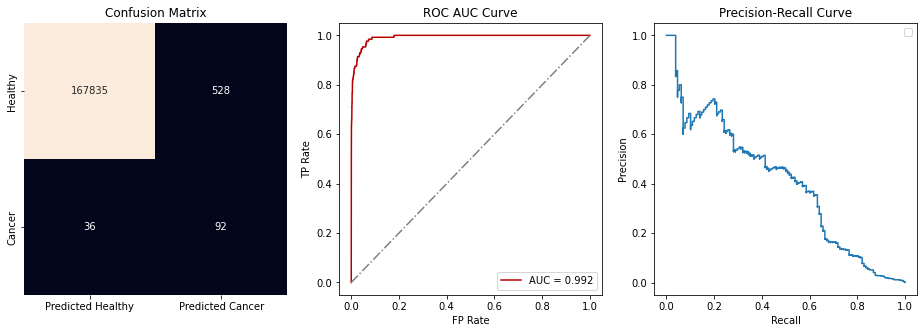

In [30]:
single_cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_single_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [31]:
single_test_cols = single_cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [ ]:
len(single_test_cols)

In [32]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in single_cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions = pd.concat(id_and_confidence)



Cross-Validation measures:
+--------------------+-----------+-------------+-----------+----------+
|                    |      mean |         std |       min |      max |
|--------------------+-----------+-------------+-----------+----------|
| precision__class_0 | 0.999656  | 0.000233684 | 0.999016  | 0.999911 |
| recall__class_0    | 0.995647  | 0.00121738  | 0.992656  | 0.997165 |
| f1-score__class_0  | 0.997647  | 0.000637951 | 0.996093  | 0.998408 |
| precision__class_1 | 0.0929891 | 0.0570439   | 0.0119048 | 0.219512 |
| recall__class_1    | 0.551473  | 0.23961     | 0.153846  | 0.888889 |
| f1-score__class_1  | 0.156035  | 0.0881143   | 0.0222222 | 0.327273 |
| accuracy           | 0.995308  | 0.00126931  | 0.992217  | 0.996823 |
| auc                | 0.961007  | 0.0299728   | 0.890369  | 0.9932   |
+--------------------+-----------+-------------+-----------+----------+


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


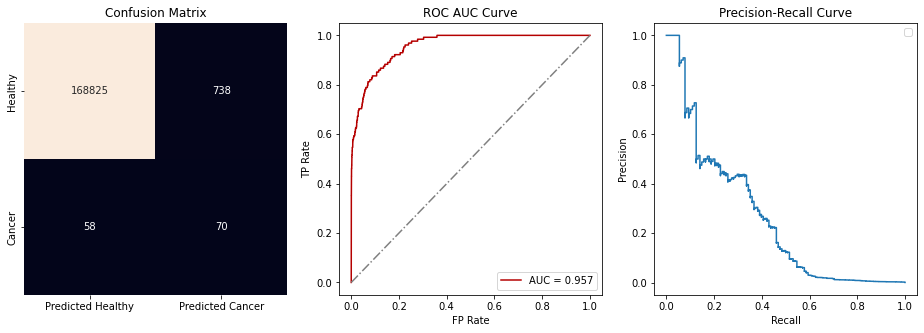

In [34]:
cv_analytics_util = load_cv_analytics_util_see_stats('experiment_participants_screened_first_5_XGBClassifier_for_cancer_in_next_1_years_15_trials')

In [35]:
test_cols = cv_analytics_util.analytics_utils[0].data_util.test_df.columns.to_list()

In [36]:
for col in test_cols:
    if col not in single_test_cols:
        print(col)

ca125ii_level_binary


(11270, 174)
(11237, 174)
(11314, 174)
(11244, 174)
(11250, 174)
(11238, 174)
(11311, 174)
(11229, 174)
(11271, 174)
(11204, 174)
(11230, 174)
(11221, 174)
(11294, 174)
(11190, 174)
(11237, 174)


Cross-Validation measures:
+--------------------+----------+-------------+-----------+----------+
|                    |     mean |         std |       min |      max |
|--------------------+----------+-------------+-----------+----------|
| precision__class_0 | 0.999607 | 0.000190697 | 0.999283  | 0.999911 |
| recall__class_0    | 0.996785 | 0.000662517 | 0.995012  | 0.9977   |
| f1-score__class_0  | 0.998194 | 0.000366251 | 0.997144  | 0.998716 |
| precision__class_1 | 0.105151 | 0.0500047   | 0.0175439 | 0.1875   |
| recall__class_1    | 0.489815 | 0.233675    | 0.111111  | 0.875    |
| f1-score__class_1  | 0.172341 | 0.0808826   | 0.030303  | 0.304348 |
| accuracy           | 0.996396 | 0.000729612 | 0.994305  | 0.997437 |
| auc                | 0.95138  | 0.0373658   | 0.86263   | 0.9970

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


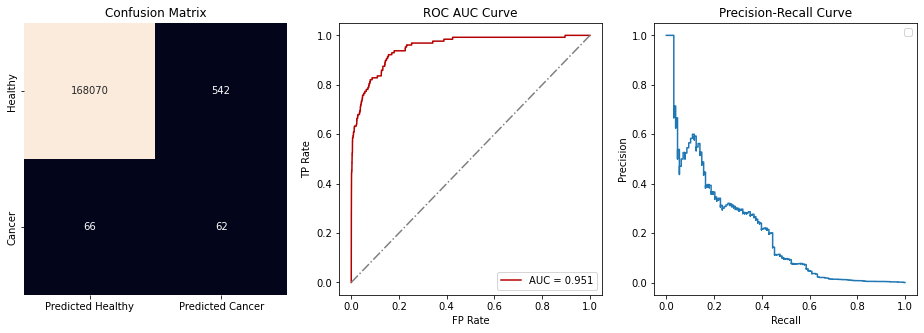

In [49]:
# Create a copy of the whole dataset
label = 'cancer_in_next_1_years'
full_dataset = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df
    full_dataset.append(X_test.copy())
full_dataset = pd.concat(full_dataset)
full_dataset = full_dataset.drop('ca125ii_level_binary', axis=1)
# Add those records to the test datasets of the single label dataset and test its validity
for analytics_util in single_cv_analytics_util.analytics_utils:
    idx = analytics_util.data_util.test_df['plco_id'].to_list()
    print((full_dataset[full_dataset['plco_id'].isin(idx)].shape))
    analytics_util.data_util.test_df = full_dataset[full_dataset['plco_id'].isin(idx)]
single_cv_analytics_util.get_cv_report();
single_cv_analytics_util.display_graph()

In [40]:
id_col = 'index'
label = 'cancer_in_next_1_years'
id_and_confidence = []
for analytics_util in cv_analytics_util.analytics_utils:
    X_test = analytics_util.data_util.test_df[[id_col, 'plco_id', label]]
    X_test_mismatch = X_test.copy()
    y_pred, y_prob = analytics_util.get_predictions() 
    X_test_mismatch[f'{label}_pred'] = y_pred
    X_test_mismatch[f'{label}_prob'] = y_prob
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] != X_test_mismatch[f'{label}_pred']]
    X_test_mismatch = X_test_mismatch[X_test_mismatch[label] == 1]
    id_and_confidence.append(X_test_mismatch)
mid_conf_predictions_2 = pd.concat(id_and_confidence)

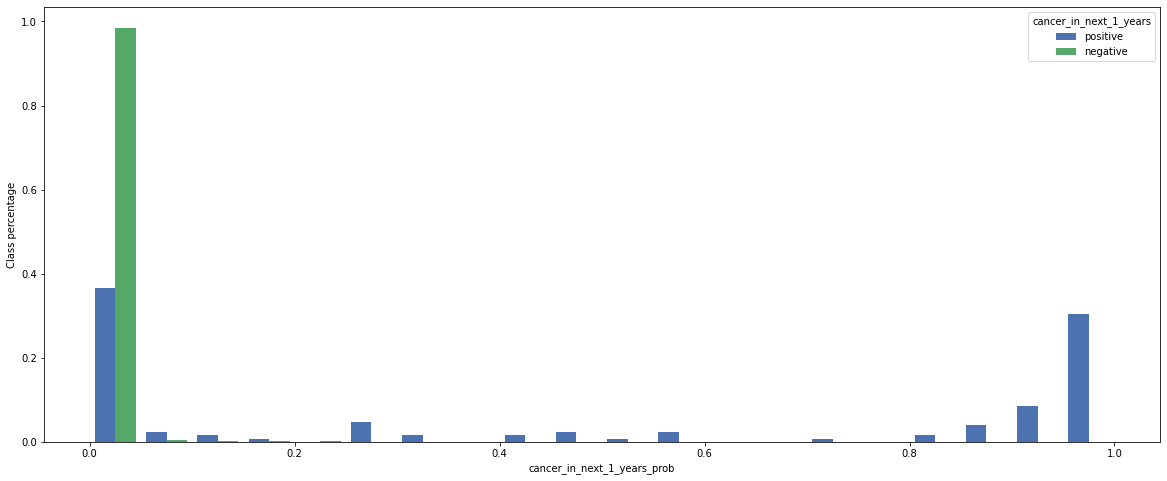

In [90]:
full_dataset = get_dataset_with_predictions(single_cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True)

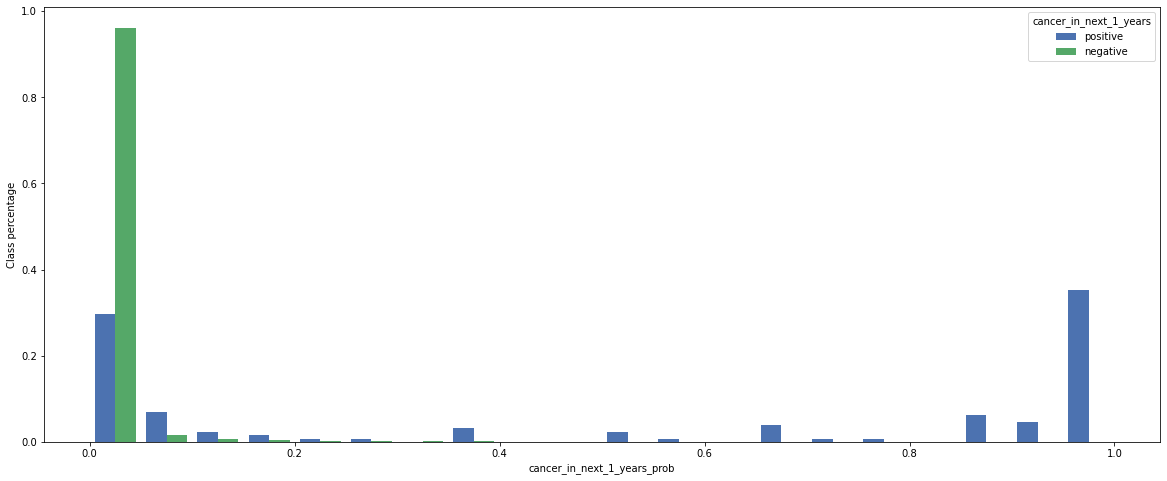

In [91]:
full_dataset = get_dataset_with_predictions(cv_analytics_util, id_col = 'index', label = 'cancer_in_next_1_years')
plot_hist_side_by_side_for_class(full_dataset, 'cancer_in_next_1_years', 'cancer_in_next_1_years_prob', normalize = True)